✅ Found 48 records in: C:\Users\ylona\OneDrive\Documents\mitdb\mitdb


Processing ECG Records:   0%|          | 0/48 [00:00<?, ?it/s]

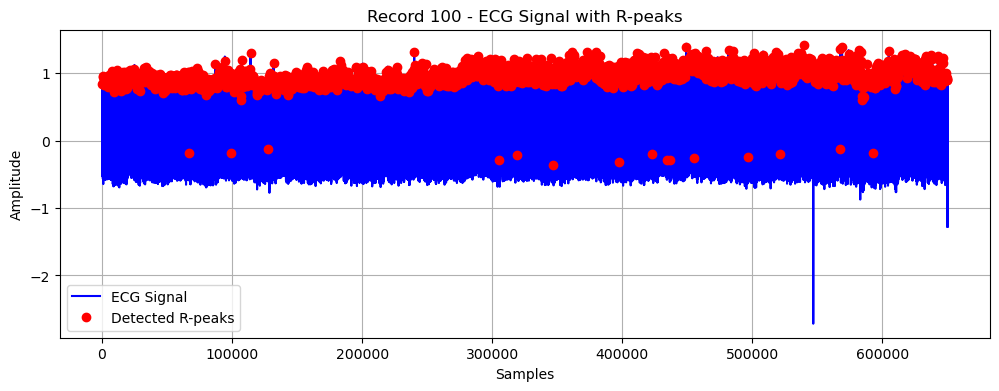

Processing ECG Records: 100%|██████████| 48/48 [00:04<00:00, 10.03it/s]



🎯 Done! Results saved to:
📁 C:\Users\ylona\OneDrive\Documents\mitdb\mitdb\beatsense_summary.csv


,Record,Heart Rate (bpm),Classification,Detected Peaks
0,100,75.44,Normal,2271
1,101,62.04,Normal,1867
2,102,72.67,Normal,2187
3,103,69.26,Normal,2084
4,104,74.05,Normal,2229
5,105,83.63,Normal,2516
6,106,63.28,Normal,1905
7,107,70.44,Normal,2119
8,108,60.24,Normal,1813
9,109,83.40,Normal,2510


In [9]:
# 🫀 BeatSense: Fast ECG Detection (Working Version)

# --- Install Required Packages ---
!pip install wfdb numpy scipy pandas matplotlib tqdm --quiet

# --- Import Libraries ---
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
from tqdm import tqdm
import os

# --- Path to Your MITDB Folder ---
data_path = r"C:\Users\ylona\OneDrive\Documents\mitdb\mitdb"

# --- Ensure Folder Exists ---
if not os.path.exists(data_path):
    raise FileNotFoundError(f"❌ Folder not found: {data_path}")

# --- Helper Functions ---
def bandpass_filter(signal, fs, lowcut=0.5, highcut=40):
    nyquist = 0.5 * fs
    b, a = butter(2, [lowcut / nyquist, highcut / nyquist], btype='band')
    return filtfilt(b, a, signal)

def detect_r_peaks(signal, fs):
    filtered = bandpass_filter(signal, fs)
    peaks, _ = find_peaks(filtered, distance=fs*0.6, height=np.mean(filtered)*0.8)
    return peaks

def classify_heart_rate(hr):
    if hr < 60:
        return "Bradycardia"
    elif hr > 100:
        return "Tachycardia"
    else:
        return "Normal"

# --- Find Available Records ---
records = sorted({os.path.splitext(f)[0] for f in os.listdir(data_path) if f.endswith('.hea')})
if not records:
    raise FileNotFoundError("❌ No .hea files found in your mitdb folder.")

print(f"✅ Found {len(records)} records in: {data_path}")

# --- Process First Few Records for Speed ---
results = []
for rec in tqdm(records, desc="Processing ECG Records"):
 
    try:
        record_path = os.path.join(data_path, rec)
        record = wfdb.rdrecord(record_path)
        fs = record.fs
        signal = record.p_signal[:, 0]  # Use first channel

        # Detect R-peaks
        peaks = detect_r_peaks(signal, fs)
        if len(peaks) < 2:
            raise ValueError("Not enough peaks detected")

        # Compute HR
        rr_intervals = np.diff(peaks) / fs
        heart_rate = 60 / np.mean(rr_intervals)
        classification = classify_heart_rate(heart_rate)

        results.append({
            "Record": rec,
            "Heart Rate (bpm)": round(heart_rate, 2),
            "Classification": classification,
            "Detected Peaks": len(peaks)
        })

        # Plot Example (First Record)
        if rec == records[0]:
            plt.figure(figsize=(12, 4))
            plt.plot(signal, label='ECG Signal', color='blue')
            plt.plot(peaks, signal[peaks], 'ro', label='Detected R-peaks')
            plt.title(f"Record {rec} - ECG Signal with R-peaks")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.grid(True)
            plt.show()

    except Exception as e:
        print(f"⚠️ Error processing {rec}: {e}")

# --- Save CSV ---
if results:
    df = pd.DataFrame(results)
    output_file = os.path.join(data_path, "beatsense_summary.csv")
    df.to_csv(output_file, index=False)
    print("\n🎯 Done! Results saved to:")
    print(f"📁 {output_file}")
    display(df)
else:
    print("❌ No valid records processed.")



# 🫀 BeatSense: ECG Heartbeat Detection and Classification

BeatSense is a Jupyter Notebook project for analyzing ECG signals using the **MIT-BIH Arrhythmia Database**.  
It detects R-peaks, computes heart rate, classifies rhythms, and exports the results to CSV.

---

## 📂 Dataset

This project uses the [MIT-BIH Arrhythmia Database](https://physionet.org/content/mitdb/1.0.0/).

📁 Place the dataset here:



---

## ⚙️ Features

✅ Bandpass filtering (0.5–40 Hz)  
✅ Automatic R-peak detection  
✅ Heart rate calculation  
✅ Rhythm classification (Normal / Bradycardia / Tachycardia)  
✅ CSV summary output  
✅ ECG signal visualization with detected peaks  

---

## 🚀 How to Run

1. Install required libraries  
   ```bash
   pip install wfdb numpy scipy pandas matplotlib tqdm
